In [2]:
# from https://www.geeksforgeeks.org/visualize-graphs-in-python/
# First networkx library is imported  
# along with matplotlib 
import networkx as nx 
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

In [3]:
options = {
        'node_color': 'pink',
        'node_size': 300,
        # 'width': 3,
        'arrowstyle': '-|>',
        # 'arrowsize': 12,
    }

def DrawGraph(edges:np.ndarray|list|tuple,title:str=None,savepath:str=None,options=options,edge_labels=None,figsize:tuple=(6.4,4.8),titlesize=12,edge_label_size=12):
    
    G = nx.Graph()
    G.add_edges_from(edges)
    
    pos = nx.spring_layout(G)

    fig, ax = plt.subplots(figsize=figsize)

    nx.draw_networkx(G,pos=pos,arrows=True,**options,ax=ax)

    if edge_labels is not None:
        edge_labels_dict = {}

        for i in range(len(edges)):
            edge_labels_dict[(edges[i][0],edges[i][1])] = edge_labels[i]

        nx.draw_networkx_edge_labels(G, pos,edge_labels_dict,ax=ax,font_size=edge_label_size)

    if title != None:
        ax.set_title(title,fontsize=titlesize)
    if savepath != None:
        fig.savefig(savepath, dpi = 600, facecolor = '#fff', bbox_inches='tight')


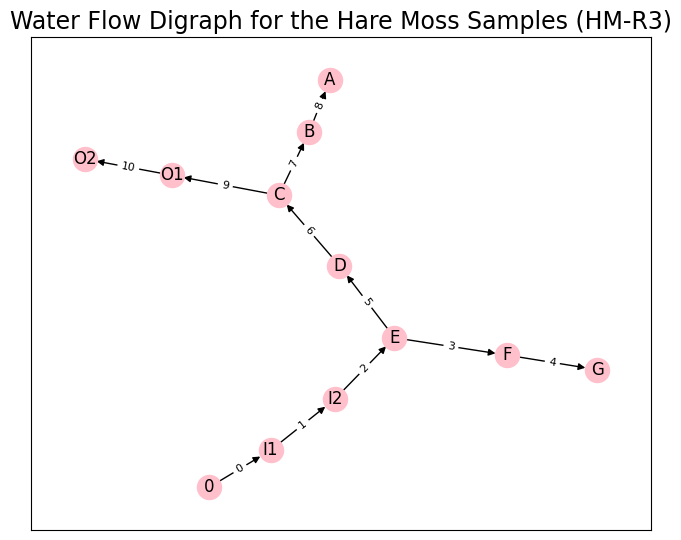

In [4]:
HM_edges = np.array([
    [f'0', f'I1'],
    [f'I1', f'I2'],
    [f'I2', f'E'],
    [f'E', f'F'],
    [f'F', f'G'],
    [f'E', f'D'],
    [f'D', f'C'],
    [f'C', f'B'],
    [f'B', f'A'],
    [f'C', f'O1'],
    [f'O1', f'O2'],
])
HM_edges_num = np.arange(len(HM_edges))

title='Water Flow Digraph for the Hare Moss Samples (HM-R3)'
DrawGraph(HM_edges,title=title,edge_labels=HM_edges_num,edge_label_size=8,figsize=(8,6.4),titlesize=17)

In [5]:
HM_nodes = np.unique(HM_edges)[1:]
idx_l = []

for i in range(len(HM_nodes)):
    idx_l2 = []
    if len(np.where(HM_edges[:,1]==HM_nodes[i])[0])>0:
        idx = np.where(HM_edges[:,1]==HM_nodes[i])[0][0]
        idx_l2.append(int(idx))

        # search up the series of edges
        while HM_edges[idx,0] in HM_edges[:,1]:
            idx = np.where(HM_edges[:,1]==HM_edges[idx,0])[0][0]
            idx_l2.append(int(idx))
    idx_l.append(idx_l2)

In [6]:
HM_nodes_v_edges = np.zeros((len(HM_nodes),len(HM_edges_num)))

for i in range(len(HM_nodes)):
    HM_nodes_v_edges[i,idx_l[i]] = 1

# HM_nodes_v_edges

In [7]:
df = pd.DataFrame(HM_nodes_v_edges,columns=HM_edges_num,index=HM_nodes)
df

,0,1,2,3,4,5,6,7,8,9,10
A,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
B,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
C,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
D,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
E,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
F,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
G,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
I1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
I2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
O1,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [8]:
def MatrixPlot(matrix,xticks=None,yticks=None,xlab=None,ylab=None,cmap='binary',title=None,tick_top:bool=True,label_top:bool=True,show_values:bool=True):
    fig = plt.figure()
    ax = fig.add_subplot()

    cmap = plt.get_cmap(cmap).copy()
    cmap.set_bad(color = '#fff', alpha = 1.)
    c = ax.pcolormesh(matrix, cmap=cmap)

    for y in range(matrix.shape[0]):
        for x in range(matrix.shape[1]):
            if matrix[y, x] < np.mean(matrix): c = '#000'
            else: c = '#fff'
            if matrix[y, x] != np.nan and show_values:
                ax.text(x + 0.5, y + 0.5, '%.0f' % matrix[y, x],
                        horizontalalignment='center',
                        verticalalignment='center',
                        c=c
                        )
    if xticks  is not None:
        locationsx = np.arange(len(matrix[0,:]))+0.5
        ax.set_xticks(locationsx, xticks)
        
    if tick_top: ax.xaxis.tick_top()

    if yticks is not None:
        locationsy = np.arange(len(matrix[:,0]))+0.5
        ax.set_yticks(locationsy, yticks)
        ax.set_ylim(len(yticks),0)

    if xlab is not None:
        ax.set_xlabel(xlab)
    if label_top: ax.xaxis.set_label_position('top') 
        
    if ylab is not None:
        ax.set_ylabel(ylab)
    if title != None:
        ax.set_title(title)

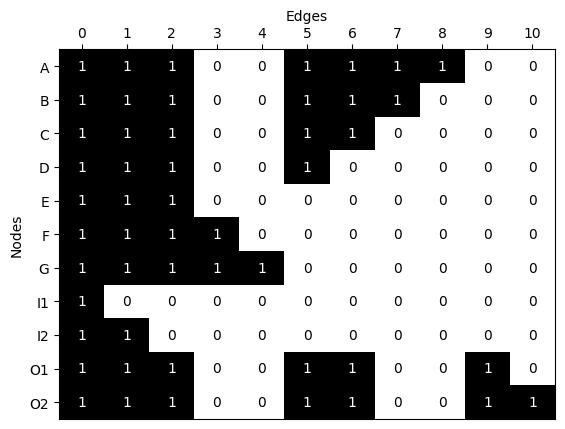

In [9]:
MatrixPlot(HM_nodes_v_edges,HM_edges_num,HM_nodes,'Edges','Nodes')

In [58]:
coord = {
    '0': [0,0],
    'I1': [1,0],
    'I2': [2,0],
    'E': [4,0],
    'D': [4.5,0],
    'C': [5,0],
    'E': [0,4],
    'F': [1,4],
    'G': [2,4],
    'B': [1,5],
    'A': [2,5],
    'O1': [7,0],
    'O2': [8,0],
}
edge_length = np.zeros(len(HM_edges))
edge_length
for i in range(len(edge_length)):
    p1 = np.array(coord[HM_edges[i][0]])
    p2 = np.array(coord[HM_edges[i][1]])
    edge_length[i] = np.linalg.norm(p1-p2)
edge_length_w = 1/edge_length #np.ones(len(HM_edges))

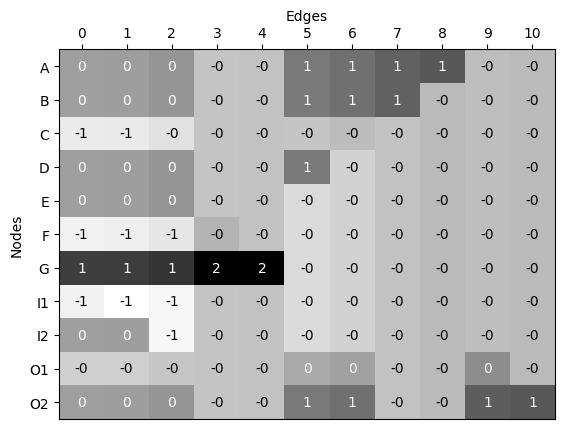

In [68]:
HM_nodes_v_edges_column_centred = np.zeros_like(HM_nodes_v_edges)

for i in range(len(HM_nodes_v_edges[0,:])):
    column = HM_nodes_v_edges[:,i]*edge_length_w
    HM_nodes_v_edges_column_centred[:,i] = (column - np.mean(column))
pd.DataFrame(HM_nodes_v_edges_column_centred)
MatrixPlot(HM_nodes_v_edges_column_centred,HM_edges_num,HM_nodes,'Edges','Nodes')

In [66]:
U, S, Vh= np.linalg.svd(HM_nodes_v_edges_column_centred)
U[np.where(np.abs(U)<1e-3)] = 0
pd.DataFrame(U)

,0,1,2,3,4,5,6,7,8,9,10
0,-0.035827,-0.503921,-0.509841,-0.184038,0.241909,0.546818,0.048756,-0.012427,0.001000,0.000000,0.301511
1,-0.033286,-0.428030,-0.287933,-0.035659,-0.132501,-0.771553,-0.123057,0.091803,-0.063893,-0.009643,0.301511
2,0.242424,0.185181,-0.030453,-0.212117,-0.140498,-0.020032,0.026447,0.055452,0.854516,0.126471,0.301511
3,-0.030652,-0.090204,0.027519,0.521559,-0.626028,0.190717,0.430387,0.097363,-0.064479,-0.008880,0.301511
4,-0.030745,0.120854,-0.016236,0.481148,0.018701,0.151340,-0.794654,-0.047943,0.037851,-0.057566,0.301511
5,0.242093,0.305062,-0.051219,-0.246852,-0.082858,0.048840,-0.072120,0.229630,-0.427991,0.665959,0.301511
6,-0.869301,0.314440,-0.006617,-0.222047,-0.007805,-0.016483,0.061336,-0.004647,0.017552,-0.027587,0.301511
7,0.302826,0.313354,-0.055594,-0.257303,-0.034241,0.022809,0.026177,0.240232,-0.239556,-0.729674,0.301511
8,0.091765,0.211370,-0.043462,0.443918,0.679946,-0.192993,0.390529,-0.033069,0.018993,0.059166,0.301511
9,0.147678,-0.014833,0.192484,-0.168603,-0.096193,-0.028585,0.041125,-0.889161,-0.137421,-0.018233,0.301511


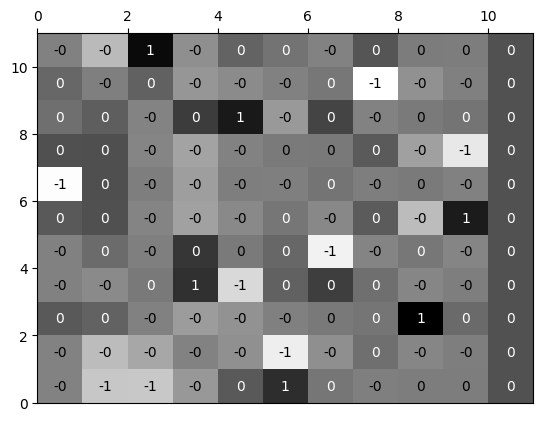

In [67]:
MatrixPlot(U)

In [19]:
np.shape(U)

(11, 11)

In [47]:
HM_edges

array([['0', 'I1'],
       ['I1', 'I2'],
       ['I2', 'E'],
       ['E', 'F'],
       ['F', 'G'],
       ['E', 'D'],
       ['D', 'C'],
       ['C', 'B'],
       ['B', 'A'],
       ['C', 'O1'],
       ['O1', 'O2']], dtype='<U2')

In [48]:
edge_length = np.zeros(len(HM_edges))
edge_length
for i in range(len(edge_length)):
    p1 = np.array(coord[HM_edges[i][0]])
    p2 = np.array(coord[HM_edges[i][1]])
    edge_length[i] = np.linalg.norm(p1-p2)
edge_length

array([1.        , 1.        , 4.12310563, 0.        , 1.        ,
       5.31507291, 0.5       , 6.40312424, 1.        , 2.        ,
       1.        ])

In [45]:
HM_edges[0]

array(['0', 'I1'], dtype='<U2')